                                       Data Science_Salaries - Analysis

In [279]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [280]:
#  Load the dataset

salaries = pd.read_csv("E:/python codes/Unified_mentor/Data Science Job Salaries.csv")
salaries.head() # To view top 5 records

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [281]:
# To find the shape of the data

salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


This dataset contains 607 rows and 12 columns

Data Preprocessing

In [282]:
# Check if the dataset contains duplicates
salaries.duplicated().sum()

0

In [283]:
# Check for null values in the dataset
salaries.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [284]:
# drop unnecessary columns if any
salaries.drop('Unnamed: 0',axis=1,inplace=True)
salaries.drop('employee_residence',axis=1,inplace=True)
salaries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         607 non-null    int64 
 1   experience_level  607 non-null    object
 2   employment_type   607 non-null    object
 3   job_title         607 non-null    object
 4   salary            607 non-null    int64 
 5   salary_currency   607 non-null    object
 6   salary_in_usd     607 non-null    int64 
 7   remote_ratio      607 non-null    int64 
 8   company_location  607 non-null    object
 9   company_size      607 non-null    object
dtypes: int64(4), object(6)
memory usage: 47.6+ KB


Exploratory data analysis

In [285]:
# Statistical summary 
salaries.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [286]:
# Check for unique values in each column
salaries.nunique()

work_year             3
experience_level      4
employment_type       4
job_title            50
salary              272
salary_currency      17
salary_in_usd       369
remote_ratio          3
company_location     50
company_size          3
dtype: int64

In [287]:
# Check for unique values in "experience_level" column
salaries["experience_level"].unique()


array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [288]:
# Check for unique values in "employment_type" column
salaries["employment_type"].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [289]:
# Check for unique values in "remote_ratio" column
salaries["remote_ratio"].unique()

array([  0,  50, 100], dtype=int64)

In [290]:

# Convert the categorical variable "experience_level" and "employment_type" into Meaningful Name

salaries["experience_level"] = salaries["experience_level"].map({
    'EN': 'Entry-level',
    'MI': 'Mid-level',
    'SE': 'Senior',
    'EX': 'Experienced'
})

salaries["employment_type"]=salaries["employment_type"].map({'PT':'Parttime','FT':'FullTime','CT':'Contract','FL':'Freelance'})

salaries["remote_ratio"]=salaries["remote_ratio"].map({0:"No Remote",50:"Parttime_Remote",100:"Fulltime_Remote"})

In [291]:
# Count of employees in each category according to experience level
exp_count=salaries["experience_level"].value_counts()
exp_count

experience_level
Senior         280
Mid-level      213
Entry-level     88
Experienced     26
Name: count, dtype: int64

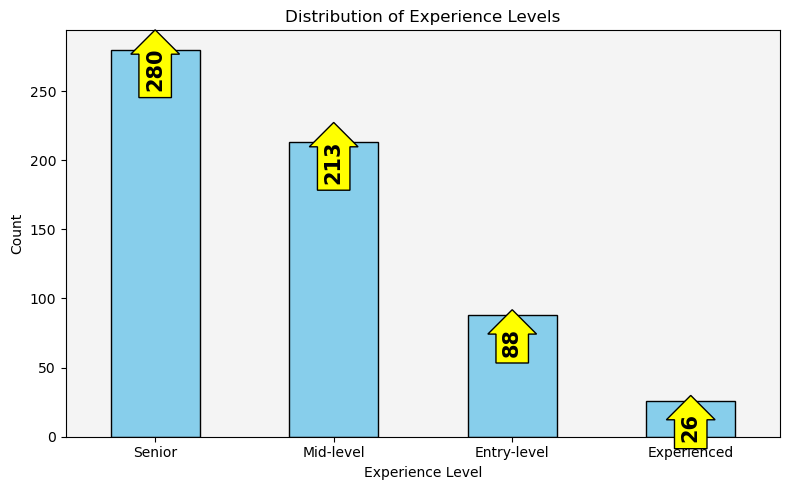

In [292]:
plt.figure(figsize=(8, 5))
p=exp_count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Experience Levels")
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
for container in p.containers:
    plt.bar_label(container,
                padding = -30,
                fontsize = 15,
                bbox = {'boxstyle': 'rarrow', 'edgecolor': 'black', 'facecolor': 'yellow'},
                label_type="edge",
                fontweight = 'bold',
                rotation = 90
                      
                 )

# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)
plt.show()

In [293]:
# count of employees in each category according to employment type
emp_count=salaries["employment_type"].value_counts()
emp_count

employment_type
FullTime     588
Parttime      10
Contract       5
Freelance      4
Name: count, dtype: int64

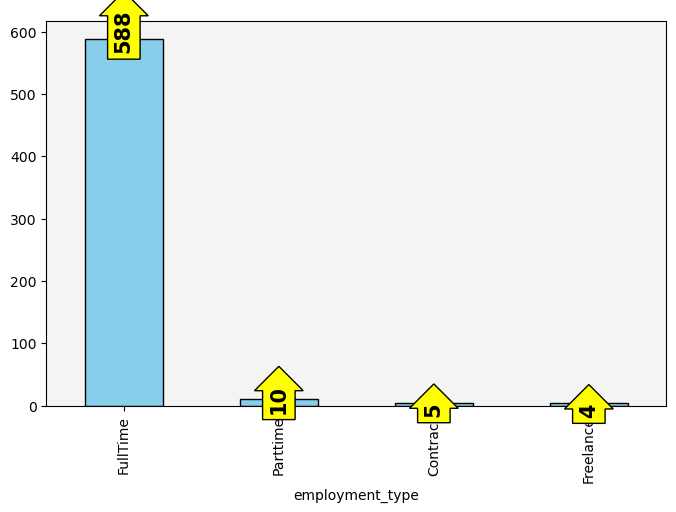

In [294]:
plt.figure(figsize=(8,5))
p=emp_count.plot(kind='bar', color='skyblue', edgecolor='black')
for container in p.containers:
    plt.bar_label(container,
                padding = -10,
                fontsize = 15,
                bbox = {'boxstyle': 'rarrow', 'edgecolor': 'black', 'facecolor': 'yellow'},
                label_type="edge",
                fontweight = 'bold',
                rotation = 90
                      
                 )

# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)
plt.show()          

In [295]:
# Let us explore the salary

mean_salary_exp= salaries.groupby("experience_level")["salary"].mean().sort_values()
print(mean_salary_exp)




experience_level
Senior         213949.353571
Entry-level    264622.454545
Experienced    427072.115385
Mid-level      480617.690141
Name: salary, dtype: float64


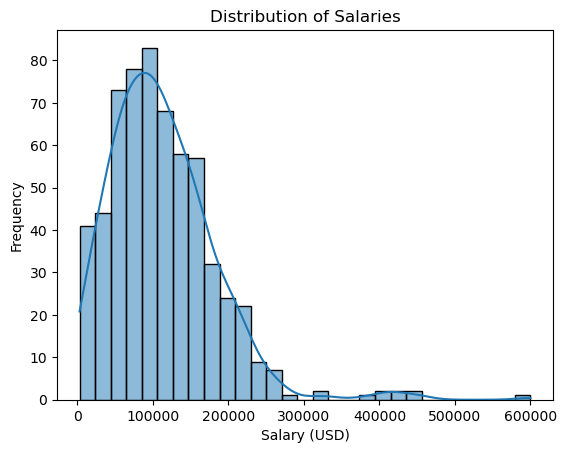

In [296]:
# Distribution of Salary
sns.histplot(salaries['salary_in_usd'], kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

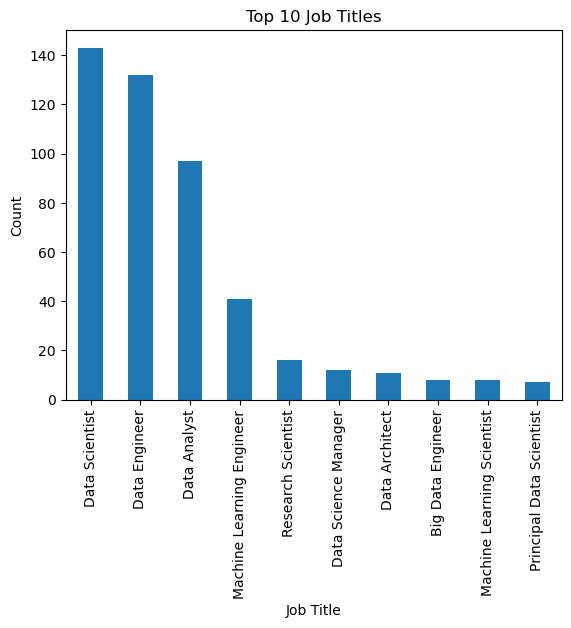

In [297]:
# Top Job Titles vs Count

salaries['job_title'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.show()

Multivariate Visualisation

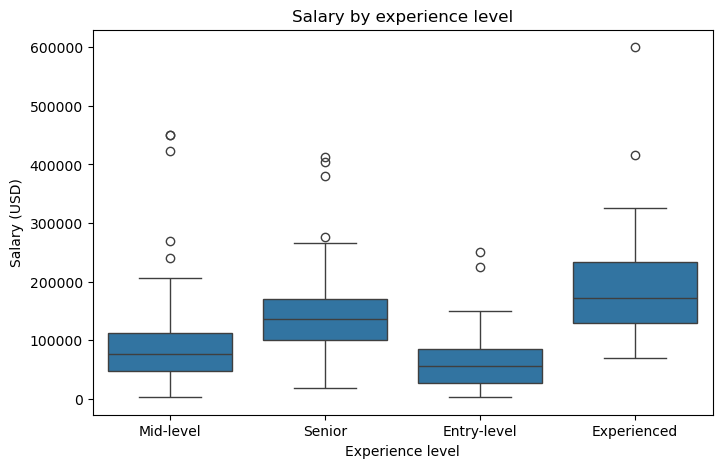

In [298]:
# Let us explore salary by experience level

plt.figure(figsize=(8,5))
sns.boxplot(x="experience_level",y="salary_in_usd",data=salaries)
plt.title("Salary by experience level")
plt.xlabel("Experience level")
plt.ylabel("Salary (USD)")
plt.show()

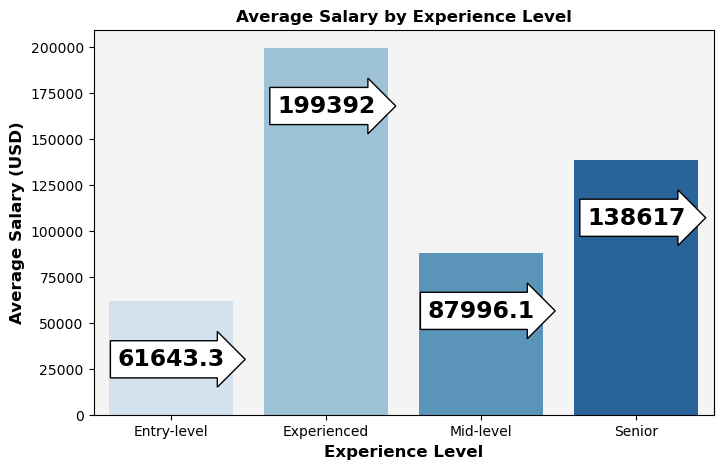

In [299]:
# Average salary by experience level
exp_salary = salaries.groupby('experience_level')['salary_in_usd'].mean()
plt.figure(figsize = (8,5))
p = sns.barplot(x = exp_salary.index, y = exp_salary.values, palette = 'Blues')
plt.title('Average Salary by Experience Level', fontsize=12, fontweight='bold')
plt.xlabel('Experience Level', fontsize=12, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')

for container in p.containers:
    p.bar_label(container,
                padding = -50,
                fontsize = 17,
                bbox = {'boxstyle': 'rarrow', 'edgecolor': 'black', 'facecolor': 'white'},
                label_type="edge",
                fontweight = 'bold'
                
                
                )

# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)

plt.show()


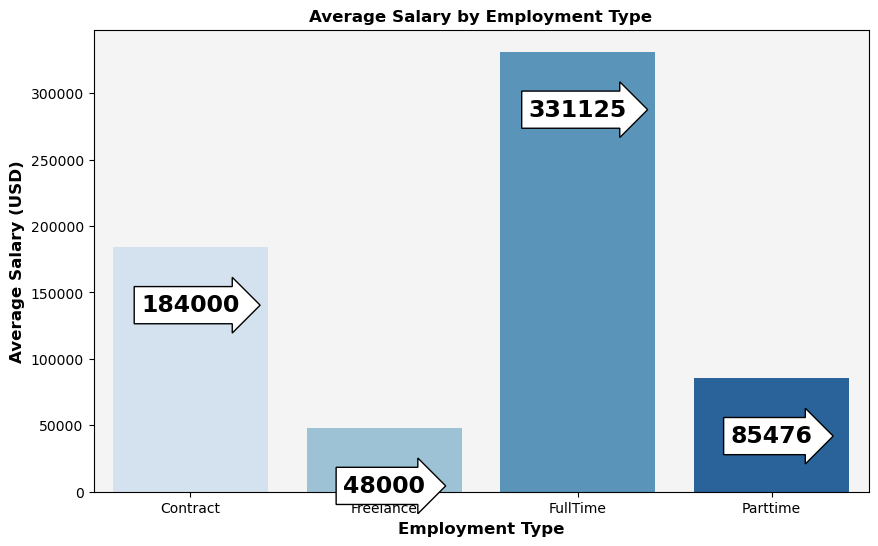

In [300]:
# Average salary by employment type
exp_salary = salaries.groupby('employment_type')['salary'].mean()
plt.figure(figsize = (10,6))
p = sns.barplot(x = exp_salary.index, y = exp_salary.values, palette = 'Blues')
plt.title('Average Salary by Employment Type', fontsize=12, fontweight='bold')
plt.xlabel('Employment Type', fontsize=12, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')

for container in p.containers:
    p.bar_label(container,
                padding = -50,
                fontsize = 17,
                bbox = {'boxstyle': 'rarrow', 'edgecolor': 'black', 'facecolor': 'white'},
                label_type="edge",
                fontweight = 'bold'
                
                
                )

# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)

plt.show()


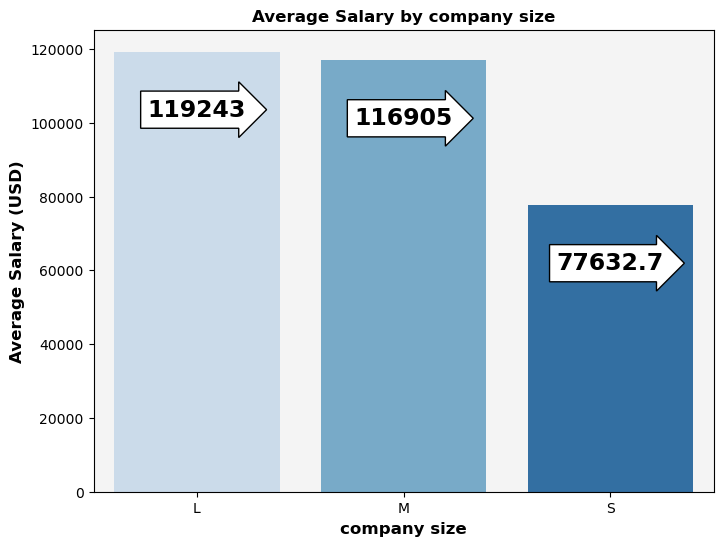

In [301]:
# Average salary by company size
exp_salary = salaries.groupby('company_size')['salary_in_usd'].mean()
plt.figure(figsize = (8,6))
p = sns.barplot(x = exp_salary.index, y = exp_salary.values, palette = 'Blues')
plt.title('Average Salary by company size', fontsize=12, fontweight='bold')
plt.xlabel('company size', fontsize=12, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')

for container in p.containers:
    p.bar_label(container,
                padding = -50,
                fontsize = 17,
                bbox = {'boxstyle': 'rarrow', 'edgecolor': 'black', 'facecolor': 'white'},
                label_type="edge",
                fontweight = 'bold'
                
                
                )

# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)

plt.show()

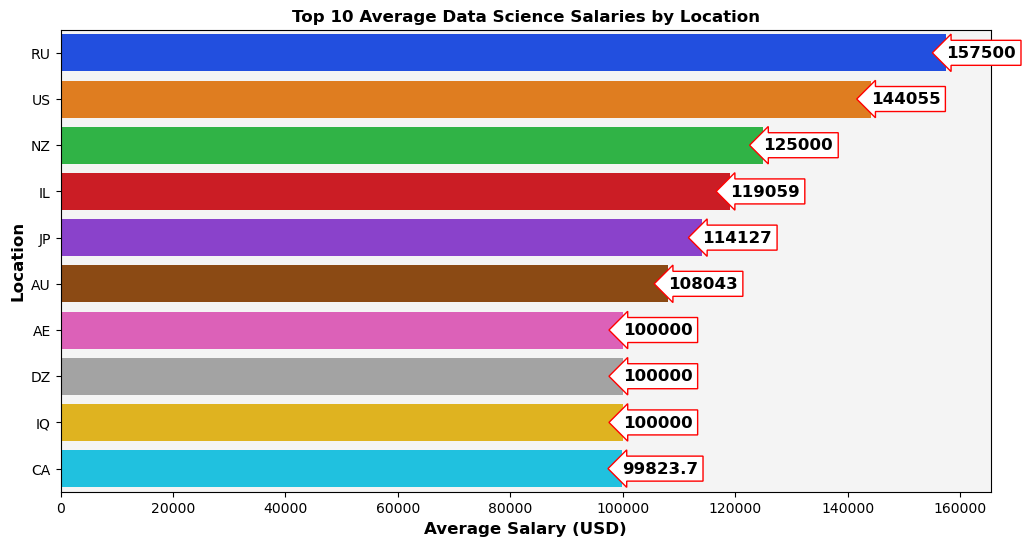

In [302]:
# Group the data by company_location and calculate the mean salary for each location
average_salaries_by_location = salaries.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Sort the locations by average salary in descending order
average_salaries_by_location = average_salaries_by_location.sort_values(by='salary_in_usd', ascending=False)

# Select the top N locations to plot
top_n_locations = 10  # You can change this number as needed

# Create a bar chart to visualize average salaries by country
plt.figure(figsize=(12, 6))
p = sns.barplot(x='salary_in_usd', y='company_location', data=average_salaries_by_location.head(top_n_locations), palette = 'bright')
plt.title('Top {} Average Data Science Salaries by Location'.format(top_n_locations), fontsize=12, fontweight='bold' )
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Location', fontsize=12, fontweight='bold')

for container in p.containers:
    p.bar_label(container,
                fontsize = 12,
                bbox = {'boxstyle': 'larrow', 'edgecolor': 'red', 'facecolor': 'white'},
                label_type="edge",
                fontweight = 'bold'
               )

# Customize the background color
p.set_facecolor("#f4f4f4")
plt.show()


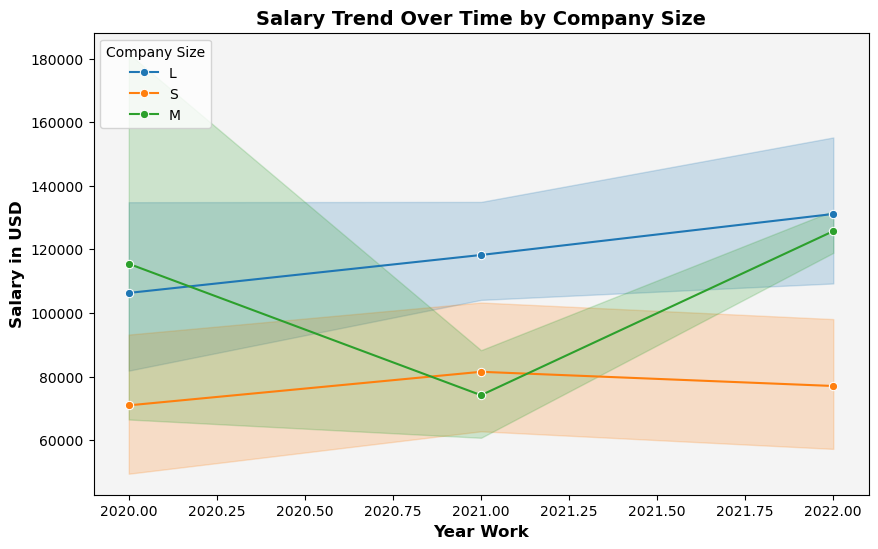

In [303]:
# salary trend by company size
plt.figure(figsize=(10, 6))
p = sns.lineplot(data=salaries, x='work_year', y='salary_in_usd', hue='company_size', marker='o')

plt.xlabel('Year Work', fontsize=12, fontweight='bold')
plt.ylabel('Salary in USD', fontsize=12, fontweight='bold')

# Add a legend
plt.legend(title='Company Size', title_fontsize=10, fontsize=10, loc='upper left')

# Add a title
plt.title('Salary Trend Over Time by Company Size', fontsize=14, fontweight='bold')


# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)
plt.show()
